In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:

# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'

# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = "data\\"+file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

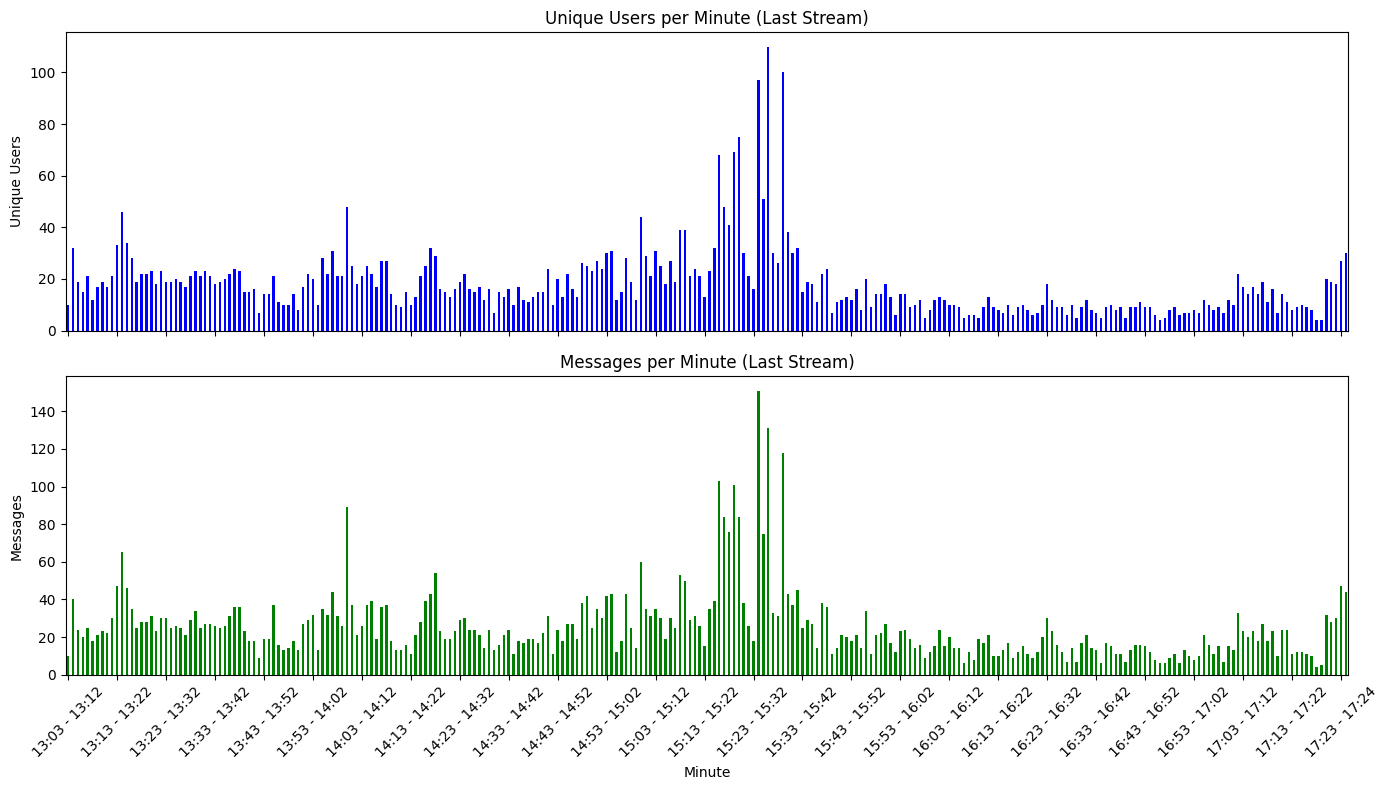

In [3]:
# Filter data for the last stream
last_stream = data['stream'].max()
last_stream_data = data[data['stream'] == last_stream].copy()

# Convert 'date' to pandas datetime
last_stream_data['date'] = pd.to_datetime(last_stream_data['date'], utc=True)

# Create a new column for minute
last_stream_data['minute'] = last_stream_data['date'].dt.floor('min')

# Group by minute and count unique users
users_per_min = last_stream_data.groupby('minute')['user'].nunique()

# Group by minute and count messages
messages_per_min = last_stream_data.groupby('minute')['message'].count()

# Plotting as bar charts
fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

users_per_min.plot(kind='bar', ax=ax[0], color='blue')
ax[0].set_ylabel('Unique Users')
ax[0].set_title('Unique Users per Minute (Last Stream)')

messages_per_min.plot(kind='bar', ax=ax[1], color='green')
ax[1].set_ylabel('Messages')
ax[1].set_title('Messages per Minute (Last Stream)')

# Set x-ticks every 10 minutes with custom labels
xticks = np.arange(0, len(users_per_min), 10)
xtick_labels = []
minutes = users_per_min.index.to_list()
for i in xticks:
    if i + 9 < len(minutes):
        start = minutes[i].strftime('%H:%M')
        end = minutes[i+9].strftime('%H:%M')
        xtick_labels.append(f"{start} - {end}")
    else:
        start = minutes[i].strftime('%H:%M')
        end = minutes[-1].strftime('%H:%M')
        xtick_labels.append(f"{start} - {end}")

plt.xticks(xticks, xtick_labels, rotation=45)
plt.xlabel('Minute')
plt.tight_layout()
plt.show()

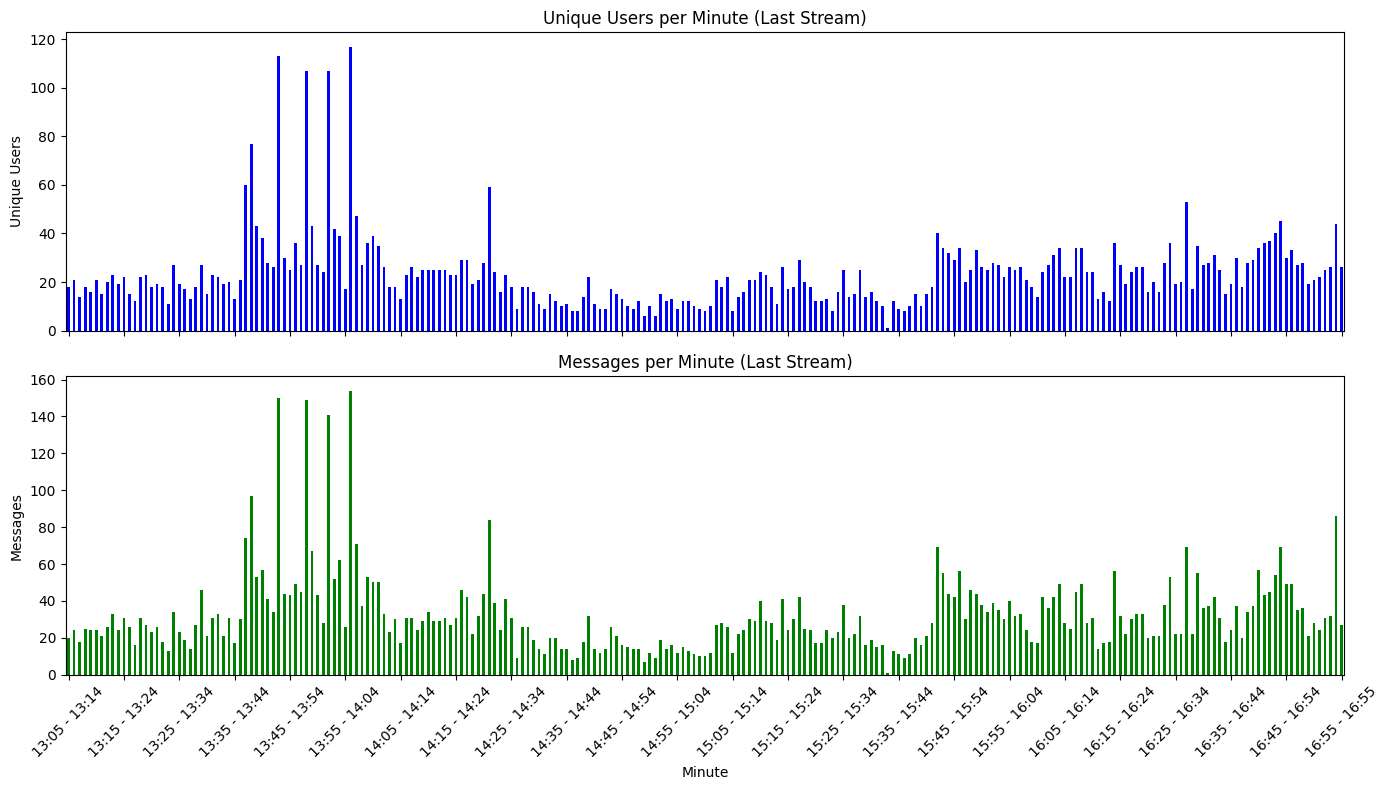

In [4]:
# Filter data for the last stream
last_stream = data['stream'].max()-1
last_stream_data = data[data['stream'] == last_stream].copy()

# Convert 'date' to pandas datetime
last_stream_data['date'] = pd.to_datetime(last_stream_data['date'], utc=True)

# Create a new column for minute
last_stream_data['minute'] = last_stream_data['date'].dt.floor('min')

# Group by minute and count unique users
users_per_min = last_stream_data.groupby('minute')['user'].nunique()

# Group by minute and count messages
messages_per_min = last_stream_data.groupby('minute')['message'].count()

# Plotting as bar charts
fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

users_per_min.plot(kind='bar', ax=ax[0], color='blue')
ax[0].set_ylabel('Unique Users')
ax[0].set_title('Unique Users per Minute (Last Stream)')

messages_per_min.plot(kind='bar', ax=ax[1], color='green')
ax[1].set_ylabel('Messages')
ax[1].set_title('Messages per Minute (Last Stream)')

# Set x-ticks every 10 minutes with custom labels
xticks = np.arange(0, len(users_per_min), 10)
xtick_labels = []
minutes = users_per_min.index.to_list()
for i in xticks:
    if i + 9 < len(minutes):
        start = minutes[i].strftime('%H:%M')
        end = minutes[i+9].strftime('%H:%M')
        xtick_labels.append(f"{start} - {end}")
    else:
        start = minutes[i].strftime('%H:%M')
        end = minutes[-1].strftime('%H:%M')
        xtick_labels.append(f"{start} - {end}")

plt.xticks(xticks, xtick_labels, rotation=45)
plt.xlabel('Minute')
plt.tight_layout()
plt.show()